# **Predicting Rating of the Busniess Using Naive Bayes Classifier from reviews**

## 5 Class Prediction of ratings


1.   1 Star
2.   2 Star
3.   3 Star
4.   4 Star
5.   5 Star



####Mount the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


####Import the required libraries.

In [2]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')
import os
import nltk
nltk.download('stopwords')
warnings.filterwarnings('ignore')
os.chdir('/content/drive/My Drive/YelpDataset')

Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

#### Importing the reviews dataset and Creating X and Y for the classifier. X is the review text and Y is the rating

In [0]:
restaurant_reviews = pd.read_csv('reviews_restaurants_text.csv')

In [0]:
x = restaurant_reviews['text']
y = restaurant_reviews['stars']

##Pre-processing

In [0]:
# Text preprocessing
import string
def text_preprocessing(text):
    no_punctuation = [ch for ch in text if ch not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [w for w in no_punctuation.split() if w.lower() not in stopwords.words('english')]


##Vectorization (Converting each review into a vector using bag-of-words approach)

In [8]:
%%time
# Estimated time: 30 min

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(analyzer=text_preprocessing).fit(x)
x = vector.transform(x)

CPU times: user 10min 26s, sys: 1min 10s, total: 11min 37s
Wall time: 11min 37s


#### Spitting data into training and test set and Building Multinomial Naive Bayes model to fit it to our training set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle =False)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

####Predict the ratings from text

In [10]:
# Testing our model on the test set

preds = classifier.predict(X_test)
print("The Actual Ratings are:",end = "")
display(Y_test[:15])
print("The Predicted Ratings are:",end = "")
print(preds[:15])

The Actual Ratings are:

123789    4
123790    4
123791    5
123792    4
123793    5
123794    5
123795    4
123796    5
123797    4
123798    5
123799    1
123800    5
123801    4
123802    4
123803    5
Name: stars, dtype: int64

The Predicted Ratings are:[5 5 4 5 5 5 5 5 5 5 1 5 5 5 5]


## Evaluating the model

## <span style="color:orangered"> Accuracy </span>

In [11]:
# Accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(Y_test, preds)

0.6642109344707251

## <span style="color:orangered"> Precision and Recall of the model</span>

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('The Precision of the Model is:' + str(precision_score(Y_test, preds, average='weighted')))
print ('The Recall of the Model is:' + str(recall_score(Y_test,preds, average='weighted')))

The Precision of the Model is:0.6249726431635203
The Recall of the Model is:0.6642109344707251


## <span style="color:orangered"> Classification Report </span>

In [13]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, preds))
print('\n')
print(classification_report(Y_test, preds))

[[ 2111    60   193   203   246]
 [  572    76   389   422   232]
 [  229    39   623  1237   494]
 [  116    19   168  2420  3865]
 [  151    38    70  1649 15326]]


              precision    recall  f1-score   support

           1       0.66      0.75      0.70      2813
           2       0.33      0.04      0.08      1691
           3       0.43      0.24      0.31      2622
           4       0.41      0.37      0.39      6588
           5       0.76      0.89      0.82     17234

    accuracy                           0.66     30948
   macro avg       0.52      0.46      0.46     30948
weighted avg       0.62      0.66      0.63     30948



## <span style="color:orangered">Confusion Matrix of the model</span>

####This function prints and plots the confusion matrix.
Normalization can be applied by setting `normalize=True`.

In [0]:
# citation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("The normalised confusion matrix of the model obtained is:")
    else:
        print('The confusion matrix obtained without normalisation is')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<Figure size 432x288 with 0 Axes>

The congusion matrix obtained without normalisation is
[[ 2111    60   193   203   246]
 [  572    76   389   422   232]
 [  229    39   623  1237   494]
 [  116    19   168  2420  3865]
 [  151    38    70  1649 15326]]


<Figure size 432x288 with 0 Axes>

The normalised confusion matrix of the model obtained is:
[[0.75 0.02 0.07 0.07 0.09]
 [0.34 0.04 0.23 0.25 0.14]
 [0.09 0.01 0.24 0.47 0.19]
 [0.02 0.   0.03 0.37 0.59]
 [0.01 0.   0.   0.1  0.89]]


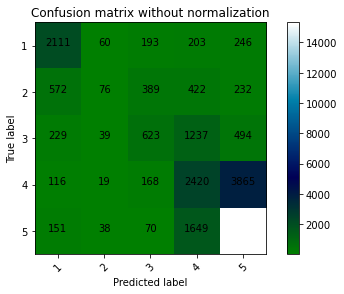

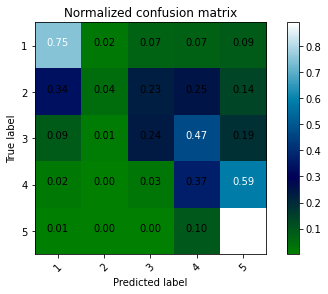

In [20]:
from sklearn import metrics
class_names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, preds
                                     )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix without normalization',cmap='ocean')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix',cmap='ocean')

plt.show()

## 2 Class Prediction of ratings


1.   1 Star
2.   5 Star

####Importing and balancing the dataset

In [0]:
# Importing the datasets
reviews = pd.read_csv('reviews_restaurants_text.csv')
reviews['text'] = reviews['text'].str[2:-2]

# Reducing the dataset to 2 classes i.e 1 and 5 star rating
reviews['stars'][reviews.stars == 3] = 1
reviews['stars'][reviews.stars == 2] = 1
reviews['stars'][reviews.stars == 4] = 5

#Undersampling of the dataset to get a balanced dataset
review1 = reviews[reviews['stars'] == 1]
review5 = reviews[reviews['stars'] == 5][0:34062]
frames = [review1, review5]
reviews = pd.concat(frames)

In [0]:
# Creating X and Y for the classifier. X is the review text and Y is the rating
x2 = reviews['text']
y2 = reviews['stars']

####Vectorization and data splitting

In [0]:
# Converting each review into a vector using bag-of-words approach

from sklearn.feature_extraction.text import CountVectorizer
vector2 = CountVectorizer(analyzer=text_preprocessing).fit(x2)
x2 = vector.transform(x2)

In [0]:
# Spitting data into training and test set
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.20, random_state=0)

####Building and testing the model

In [26]:
# Building Multinomial Naive Bayes modle and fit it to our training set
from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
classifier2.fit(X2_train, Y2_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Testing our model on the test set
Y2_pred = classifier2.predict(X2_test)

## <span style="color:orangered"> Classification Report </span>

In [28]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y2_test, Y2_pred))
print('\n')
print(classification_report(Y2_test, Y2_pred))

[[6232  821]
 [ 815 6112]]


              precision    recall  f1-score   support

           1       0.88      0.88      0.88      7053
           5       0.88      0.88      0.88      6927

    accuracy                           0.88     13980
   macro avg       0.88      0.88      0.88     13980
weighted avg       0.88      0.88      0.88     13980



## <span style="color:orangered"> Accuracy of the model </span>

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(Y2_test, Y2_pred)

0.8829756795422031

## <span style="color:orangered"> Precision and Recall of the model</span>

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('The Precision of the Model is:' + str(precision_score(Y2_test, Y2_pred, average='weighted')))
print ('The Recall of the Model is:' + str(recall_score(Y2_test, Y2_pred, average='weighted')))

The Precision of the Model is:0.8829768671405934
The Recall of the Model is:0.8829756795422031


## <span style="color:orangered"> Confusion Matrix of the model </font>

<Figure size 432x288 with 0 Axes>

The congusion matrix obtained without normalisation is
[[6232  821]
 [ 815 6112]]


<Figure size 432x288 with 0 Axes>

The normalised confusion matrix of the model obtained is:
[[0.88 0.12]
 [0.12 0.88]]


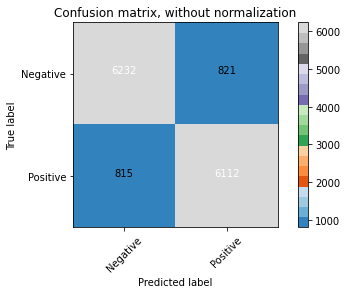

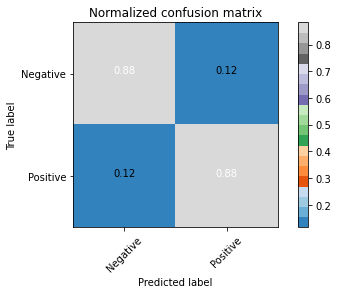

In [32]:
class_names = ['Negative','Positive']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y2_test, Y2_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes =class_names, title='Confusion matrix, without normalization',cmap='tab20c')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes =class_names, normalize=True,title='Normalized confusion matrix',cmap='tab20c')

plt.show()